In [30]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import string
import re

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 100

In [7]:
twitter_data = pd.read_csv("tweets.csv")

In [8]:
print('number of account: ' , len(twitter_data['username'].unique()))
print("number of tweets: ",twitter_data.shape[0])

print('Columns are:',twitter_data.columns)

number of account:  11906
number of tweets:  36467
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')


In [9]:
exclude =['conversation_id', 'created_at','timezone','place','photos','cashtags','quote_url','video', 'near', 'geo' ,'source','user_rt_id' ,'user_rt' , 'retweet_id' ,
          'reply_to' ,'retweet_date' ,'translate', 'trans_src','link', 'trans_dest']
for col in exclude:
    del twitter_data[col]
twitter_data.columns

Index(['id', 'date', 'time', 'user_id', 'username', 'name', 'tweet',
       'mentions', 'urls', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'retweet'],
      dtype='object')

In [10]:
# find number of missing data based on each column
missing_data = twitter_data.isnull()
for column in missing_data.columns.values.tolist():
    print("\n")
    print("*******************")
    print(column)
    print(missing_data[column].value_counts())



*******************
id
False    36467
Name: id, dtype: int64


*******************
date
False    36467
Name: date, dtype: int64


*******************
time
False    36467
Name: time, dtype: int64


*******************
user_id
False    36467
Name: user_id, dtype: int64


*******************
username
False    36467
Name: username, dtype: int64


*******************
name
False    36464
True         3
Name: name, dtype: int64


*******************
tweet
False    36467
Name: tweet, dtype: int64


*******************
mentions
False    36467
Name: mentions, dtype: int64


*******************
urls
False    36467
Name: urls, dtype: int64


*******************
replies_count
False    36467
Name: replies_count, dtype: int64


*******************
retweets_count
False    36467
Name: retweets_count, dtype: int64


*******************
likes_count
False    36467
Name: likes_count, dtype: int64


*******************
hashtags
False    36467
Name: hashtags, dtype: int64


*******************
retweet
Fals

In [13]:
pd.DataFrame(twitter_data.dtypes, columns ={'type'})

,type
id,int64
date,object
time,object
user_id,int64
username,object
name,object
tweet,object
mentions,object
urls,object
replies_count,int64


In [14]:
twitter_data.head()

,id,date,time,user_id,username,name,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,retweet
0,1281895607410589696,2020-07-11,14:48:23,1276618926882000897,parnianeqbalian,Parnian Eghbalian,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",['icao'],['https://twitter.com/icao/status/1281628066532528129'],0,0,1,['#ps752'],False
1,1281862144498245637,2020-07-11,12:35:25,1246539661306138630,covid009,Zoroaster,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,[],['https://humanrightsintl.com/2020/07/08/iran-must-be-taken-to-international-court-for-shooting-...,0,0,0,[],False
2,1281861826230333441,2020-07-11,12:34:09,1246539661306138630,covid009,Zoroaster,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,"['agnescallamard', 'harlemdesir', 'iranlionness', 'fereeon', 'faranakazad1']",[],1,0,1,"['#iranian', '#soleimani', '#ps752', '#iraninanprotesters']",False
3,1281852107054874624,2020-07-11,11:55:32,1236026956778528771,forps752,For PS752,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,"['icao', 'unlibrary']",[],0,0,1,[],False
4,1281849546776162304,2020-07-11,11:45:22,2343557479,mostafame4,mostafa.m Ⓜ️,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",[],['https://twitter.com/HeshmatAlavi/status/1281672046276227072'],0,7,9,"['#iran', '#canadian', '#ps752']",False


In [15]:
pd.DataFrame(twitter_data['username'].value_counts())

,username
smohyeddin,395
joker_phd,280
annarajskaya,246
babaktaghvaee,235
ps752justice,234
...,...
ctausigford,1
red_pill_qanon,1
pembinatrails,1
dougeyolfson,1


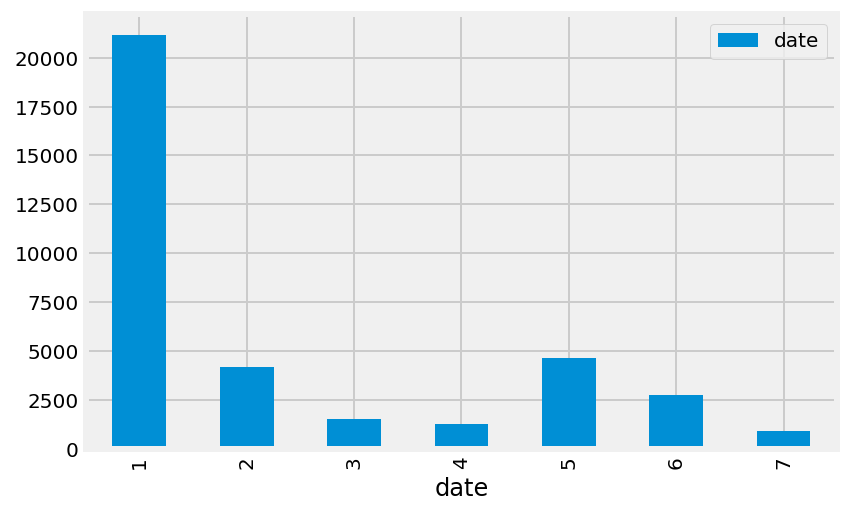

In [16]:
twitter_data["date"] = twitter_data["date"].astype("datetime64")
date = pd.DataFrame(twitter_data["date"])
date.groupby(date["date"].dt.month).count().plot(kind="bar")

In [19]:
tweets = twitter_data[['tweet']].copy()
tweets

,tweet
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t..."
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the..."
...,...
36462,PS752 Call sign is it this Aircraft?
36463,"flight PS752, B738 UR-PSR"
36464,@flightradar24 rumors that Ukrainan 737 crashed in Iran?\n\nI assume it’s PS752?
36465,appears to be PS752


In [20]:
tweets.isna().sum()

tweet    0
dtype: int64

In [21]:
rand_indexs = np.random.randint(1,len(tweets),10).tolist()
tweets["tweet"][rand_indexs]

30583    Justin Truder: Research by Canada and our allies shows that the aircraft was hit by iranian grou...
10743    1/2\nJavad Soleimani (@JavadSoleimani8) a husband victim of #PS752 addressed Iranian officials “...
25883    Iran admitting to #PS752 was the right thing to do, and fair play to them. \n\nHowever, with the...
26476    1. The crucial next part of the investigation #PS752. This is Iran’s account of what happened mi...
28987    #uspoli #cdnpoli #pnpcbc #UKpolitics #auspol #polcan #eupol #nzpol #CTVpp #CTVqp #MH17 #PS752 Tr...
32029    Well maybe with #ps752 the Iranians might actually accept Americas claim that #ir655 was  accide...
8030             EU members: Justice for PS752 - Sign the Petition!  http://chng.it/BxLVyLCL  via @CdnChange
21006    Maple Leaf Foods CEO takes aim at U.S. government over downing of PS752 by Iran | #narcissist #T...
1239             EU members: Justice for PS752 - Sign the Petition!  http://chng.it/YBcpP7tH  via @CdnChange
16544    Almost fou

In [31]:
def remove_punct(text):
    text =  text.replace("#", "").replace("_", " ")
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+',  ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', "", text)
    text = text.replace('\n', ' ')
    return text

In [32]:
tweets['Tweet_punct'] = tweets['tweet'].apply(lambda x: remove_punct(x))
tweets.head()

,tweet,Tweet_punct
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...


In [38]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweets['Tweet_tokenized'] = tweets['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweets.head()

,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...,"[irgc, shot, ps, and, after, months, didn, t, even, hand, out, the, black, box, which, is, a, li...","[I, R, G, C, , h, , #, P, S, 7, 5, 2, , n, , f, e, r, , 6, , n, h, , n, ’, , e, v, e, n,..."
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...,"[iran, must, be, taken, to, international, court, for, shooting, down, flight, ps, international...","[I, r, n, , M, u, , B, e, , T, k, e, n, , , I, n, e, r, n, n, l, , C, u, r, , F, r, , S,..."
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...,"[agnescallamard, us, the, people, iranian, want, to, be, clear, that, soleimani, was, alone, res...","[@, A, g, n, e, C, l, l, r, , u, , h, e, , p, e, p, l, e, , #, I, r, n, n, , w, n, , , b,..."
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame,"[go, to, article, what, is, your, reaction, to, irans, noncompliancestaying, neutralshame]","[G, , , A, r, c, l, e, , 8, 8, !, , W, h, , , u, r, , r, e, c, n, , , I, r, n, ', , n,..."
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...,"[in, iran, therapists, and, murdered, are, the, judge, and, prosecutors, the, killer, of, zahra,...","[I, n, , #, I, r, n, ,, , h, e, r, p, , n, , u, r, e, r, e, , r, e, , h, e, , j, u, g, e,..."


In [39]:
import nltk
from nltk.tokenize import word_tokenize
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets['Tweet_nonstop'] = tweets['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweets.head()

,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...,"[irgc, shot, ps, and, after, months, didn, t, even, hand, out, the, black, box, which, is, a, li...","[irgc, shot, ps, months, even, hand, black, box, little, step, gets, us, closer, finding, truth,..."
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...,"[iran, must, be, taken, to, international, court, for, shooting, down, flight, ps, international...","[iran, must, taken, international, court, shooting, flight, ps, international, centre, human, ri..."
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...,"[agnescallamard, us, the, people, iranian, want, to, be, clear, that, soleimani, was, alone, res...","[agnescallamard, us, people, iranian, want, clear, soleimani, alone, responsible, downing, fligh..."
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame,"[go, to, article, what, is, your, reaction, to, irans, noncompliancestaying, neutralshame]","[go, article, reaction, irans, noncompliancestaying, neutralshame]"
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...,"[in, iran, therapists, and, murdered, are, the, judge, and, prosecutors, the, killer, of, zahra,...","[iran, therapists, murdered, judge, prosecutors, killer, zahra, kazemi, iraniancanadian, journal..."


In [41]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets['Tweet_stemmed'] = tweets['Tweet_nonstop'].apply(lambda x: stemming(x))
tweets.head()

,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...,"[irgc, shot, ps, and, after, months, didn, t, even, hand, out, the, black, box, which, is, a, li...","[irgc, shot, ps, months, even, hand, black, box, little, step, gets, us, closer, finding, truth,...","[irgc, shot, ps, month, even, hand, black, box, littl, step, get, us, closer, find, truth, goe, ..."
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...,"[iran, must, be, taken, to, international, court, for, shooting, down, flight, ps, international...","[iran, must, taken, international, court, shooting, flight, ps, international, centre, human, ri...","[iran, must, taken, intern, court, shoot, flight, ps, intern, centr, human, right, httpshumanrig..."
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...,"[agnescallamard, us, the, people, iranian, want, to, be, clear, that, soleimani, was, alone, res...","[agnescallamard, us, people, iranian, want, clear, soleimani, alone, responsible, downing, fligh...","[agnescallamard, us, peopl, iranian, want, clear, soleimani, alon, respons, down, flight, ps, ki..."
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame,"[go, to, article, what, is, your, reaction, to, irans, noncompliancestaying, neutralshame]","[go, article, reaction, irans, noncompliancestaying, neutralshame]","[go, articl, reaction, iran, noncompliancestay, neutralsham]"
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...,"[in, iran, therapists, and, murdered, are, the, judge, and, prosecutors, the, killer, of, zahra,...","[iran, therapists, murdered, judge, prosecutors, killer, zahra, kazemi, iraniancanadian, journal...","[iran, therapist, murder, judg, prosecutor, killer, zahra, kazemi, iraniancanadian, journalist, ..."


In [42]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets['Tweet_lemmatized'] = tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweets.head()

,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...,"[irgc, shot, ps, and, after, months, didn, t, even, hand, out, the, black, box, which, is, a, li...","[irgc, shot, ps, months, even, hand, black, box, little, step, gets, us, closer, finding, truth,...","[irgc, shot, ps, month, even, hand, black, box, littl, step, get, us, closer, find, truth, goe, ...","[irgc, shot, p, month, even, hand, black, box, little, step, get, u, closer, finding, truth, go,..."
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...,"[iran, must, be, taken, to, international, court, for, shooting, down, flight, ps, international...","[iran, must, taken, international, court, shooting, flight, ps, international, centre, human, ri...","[iran, must, taken, intern, court, shoot, flight, ps, intern, centr, human, right, httpshumanrig...","[iran, must, taken, international, court, shooting, flight, p, international, centre, human, rig..."
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...,"[agnescallamard, us, the, people, iranian, want, to, be, clear, that, soleimani, was, alone, res...","[agnescallamard, us, people, iranian, want, clear, soleimani, alone, responsible, downing, fligh...","[agnescallamard, us, peopl, iranian, want, clear, soleimani, alon, respons, down, flight, ps, ki...","[agnescallamard, u, people, iranian, want, clear, soleimani, alone, responsible, downing, flight..."
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame,"[go, to, article, what, is, your, reaction, to, irans, noncompliancestaying, neutralshame]","[go, article, reaction, irans, noncompliancestaying, neutralshame]","[go, articl, reaction, iran, noncompliancestay, neutralsham]","[go, article, reaction, iran, noncompliancestaying, neutralshame]"
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...,"[in, iran, therapists, and, murdered, are, the, judge, and, prosecutors, the, killer, of, zahra,...","[iran, therapists, murdered, judge, prosecutors, killer, zahra, kazemi, iraniancanadian, journal...","[iran, therapist, murder, judg, prosecutor, killer, zahra, kazemi, iraniancanadian, journalist, ...","[iran, therapist, murdered, judge, prosecutor, killer, zahra, kazemi, iraniancanadian, journalis..."


In [46]:
tweets_text = tweets.tweet.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(21279, ':/'),
 (9558, ': '),
 (238, 'x.'),
 (36, ':('),
 (19, 'X.'),
 (17, ':)'),
 (11, '::'),
 (5, ';)'),
 (3, ':-('),
 (2, ':|'),
 (1, ':-/')]

In [47]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(HAPPY_EMO, tweets_text)))
print("Sad emoticons:", set(re.findall(SAD_EMO, tweets_text)))

Happy emoticons: {';)', ':)'}
Sad emoticons: {':(', ':|', ':/'}


In [48]:
from nltk.tokenize import word_tokenize

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [49]:
words = set(nltk.corpus.words.words())

test_text_data = " ".join(w for w in nltk.wordpunct_tokenize(tweets.tweet.str.cat()) \
         if w.lower() in words or not w.isalpha())

In [50]:
most_used_words(test_text_data)[:10]

There is 30062 different words


['.', '-', '#', '/', 'the', 'PS752', ':', 'of', ',', 'to']

In [53]:
from nltk.corpus import stopwords

# nltk.download("stopwords")

mw = most_used_words(tweets.Tweet_punct.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 58493 different words


In [55]:
sorted(most_words)

['A',
 'Affairs',
 'Afghan',
 'Afghanistan',
 'After',
 'Air',
 'Airline',
 'Airlines',
 'Airport',
 'Alberta',
 'Ali',
 'All',
 'American',
 'Americans',
 'Amir',
 'And',
 'Apparently',
 'As',
 'At',
 'Aviation',
 'B',
 'BBC',
 'BREAKING',
 'Black',
 'Boeing',
 'British',
 'But',
 'By',
 'C',
 'CBC',
 'CD',
 'CEO',
 'CNN',
 'COVID',
 'CTVpp',
 'CTVqp',
 'Canada',
 'CanadaStrong',
 'Canadas',
 'Canadian',
 'Canadians',
 'CdnChangeEU',
 'Champagne',
 'Champagnestatus',
 'Change',
 'ChangeEU',
 'China',
 'Civil',
 'Coordination',
 'Covid',
 'Crash',
 'D',
 'DB',
 'Did',
 'Do',
 'Down',
 'Dsharebar',
 'E',
 'EU',
 'Edmonton',
 'Esmaeilion',
 'F',
 'FM',
 'FP',
 'Families',
 'Flight',
 'FlightPS',
 'For',
 'Foreign',
 'France',
 'FreeIran',
 'General',
 'Geolocated',
 'Germany',
 'Group',
 'Guard',
 'Guards',
 'Hamed',
 'HassanRouhani',
 'He',
 'Here',
 'How',
 'I',
 'ICAO',
 'IR',
 'IRAN',
 'IRGC',
 'IRGCTerrorists',
 'IRI',
 'If',
 'Im',
 'Imam',
 'In',
 'Int',
 'International',
 'Intl',

In [56]:
# tweets.to_csv('flight_test.csv')

In [57]:
test_data=pd.read_csv('flight_test.csv')
test_data.head()

,Unnamed: 0,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,"IRGC shot #PS752 and after 6 months didn’t even hand out the black box, which is a little step t...",IRGC shot PS and after months didn’t even hand out the black box which is a little step that ...,"['irgc', 'shot', 'ps', 'and', 'after', 'months', 'didn', 't', 'even', 'hand', 'out', 'the', 'bla...","['irgc', 'shot', 'ps', 'months', 'even', 'hand', 'black', 'box', 'little', 'step', 'gets', 'us',...","['irgc', 'shot', 'ps', 'month', 'even', 'hand', 'black', 'box', 'littl', 'step', 'get', 'us', 'c...","['irgc', 'shot', 'p', 'month', 'even', 'hand', 'black', 'box', 'little', 'step', 'get', 'u', 'cl..."
1,1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,Iran Must Be Taken to International Court For Shooting Down Flight PS International Centre for...,"['iran', 'must', 'be', 'taken', 'to', 'international', 'court', 'for', 'shooting', 'down', 'flig...","['iran', 'must', 'taken', 'international', 'court', 'shooting', 'flight', 'ps', 'international',...","['iran', 'must', 'taken', 'intern', 'court', 'shoot', 'flight', 'ps', 'intern', 'centr', 'human'...","['iran', 'must', 'taken', 'international', 'court', 'shooting', 'flight', 'p', 'international', ..."
2,2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,AgnesCallamard us the people Iranian want to be clear that Soleimani was alone responsible for d...,"['agnescallamard', 'us', 'the', 'people', 'iranian', 'want', 'to', 'be', 'clear', 'that', 'solei...","['agnescallamard', 'us', 'people', 'iranian', 'want', 'clear', 'soleimani', 'alone', 'responsibl...","['agnescallamard', 'us', 'peopl', 'iranian', 'want', 'clear', 'soleimani', 'alon', 'respons', 'd...","['agnescallamard', 'u', 'people', 'iranian', 'want', 'clear', 'soleimani', 'alone', 'responsible..."
3,3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,Go to Article What is your reaction to Irans noncompliancestaying neutralShame,"['go', 'to', 'article', 'what', 'is', 'your', 'reaction', 'to', 'irans', 'noncompliancestaying',...","['go', 'article', 'reaction', 'irans', 'noncompliancestaying', 'neutralshame']","['go', 'articl', 'reaction', 'iran', 'noncompliancestay', 'neutralsham']","['go', 'article', 'reaction', 'iran', 'noncompliancestaying', 'neutralshame']"
4,4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",In Iran therapists and murdered are the judge and prosecutors The killer of Zahra Kazemi the Ira...,"['in', 'iran', 'therapists', 'and', 'murdered', 'are', 'the', 'judge', 'and', 'prosecutors', 'th...","['iran', 'therapists', 'murdered', 'judge', 'prosecutors', 'killer', 'zahra', 'kazemi', 'iranian...","['iran', 'therapist', 'murder', 'judg', 'prosecutor', 'killer', 'zahra', 'kazemi', 'iraniancanad...","['iran', 'therapist', 'murdered', 'judge', 'prosecutor', 'killer', 'zahra', 'kazemi', 'iranianca..."


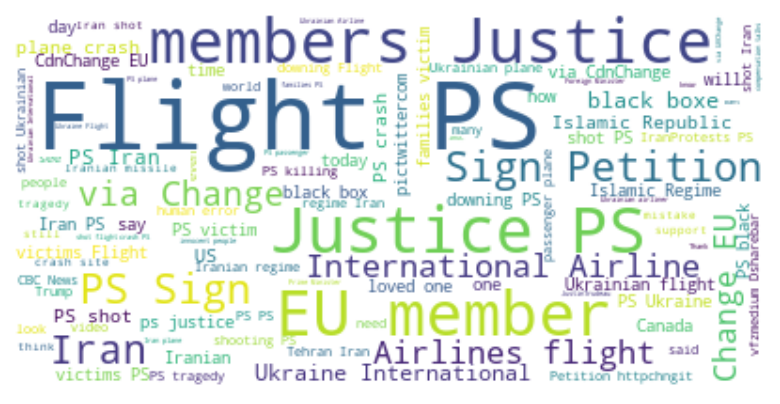

<Figure size 432x288 with 0 Axes>

In [58]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = " ".join(tweet for tweet in test_data.Tweet_punct)
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords = set(STOPWORDS)
# stopwords.add(search_modifier)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords= stopwords ,  background_color="white").generate(text)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('1.png')

In [59]:
train_data = pd.read_csv("train.csv", encoding='ISO-8859-1')
train_data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,5,0,i think mi bf is cheating on me!!! T_T
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hope you're able to find something.
99985,99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll se..."
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

In [63]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

In [64]:
class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        # mark emoticons as happy or sad
        X = X.str.replace(HAPPY_EMO, " happyemoticons ")
        X = X.str.replace(SAD_EMO, " sademoticons ")
        X = X.str.lower()
        return X

In [65]:
# This is the pipeline that will transform our tweets to something eatable.
# You can see that we are using our previously defined stemmer, it will
# take care of the stemming process.
# For stop words, we let the inverse document frequency do the job
from sklearn.model_selection import train_test_split

sentiments = train_data['Sentiment']
tweets = train_data['SentimentText']

# I get those parameters from the 'Fine tune the model' part
vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
pipeline = Pipeline([
    ('text_pre_processing', TextPreProc(use_mention=True)),
    ('vectorizer', vectorizer),
])

# Let's split our data into learning set and testing set
# This process is done to test the efficency of our model at the end.
# You shouldn't look at the test data only after choosing the final model
learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)

# This will tranform our learning data from simple text to vector
# by going through the preprocessing tranformer.
learning_data = pipeline.fit_transform(learn_data)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

models = {
    'logitic regression': lr,
    'bernoulliNB': bnb,
    'multinomialNB': mnb,
}

for model in models.keys():
    scores = cross_val_score(models[model], learning_data, sentiments_learning, scoring="f1", cv=10)
    print("===", model, "===")
    print("scores = ", scores)
    print("mean = ", scores.mean())
    print("variance = ", scores.var())
    models[model].fit(learning_data, sentiments_learning)
    print("score on the learning data (accuracy) = ", accuracy_score(models[model].predict(learning_data), sentiments_learning))
    print("")

C:\Users\behdad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=== logitic regression ===
scores =  [0.80839262 0.80481348 0.81115673 0.81635598 0.81066731 0.81472541
 0.80510106 0.81103315 0.8143409  0.81887293]
mean =  0.8115459562391066
variance =  1.9273455494155187e-05
score on the learning data (accuracy) =  0.8710281174991428

=== bernoulliNB ===
scores =  [0.79409352 0.78315789 0.78782201 0.79332867 0.78453427 0.78865016
 0.78051066 0.78802169 0.78919677 0.7884458 ]
mean =  0.7877761450364134
variance =  1.586579352994925e-05
score on the learning data (accuracy) =  0.9020173734141045

=== multinomialNB ===
scores =  [0.81247911 0.80347014 0.80923695 0.81188338 0.80745203 0.81060102
 0.8060727  0.81104554 0.811306   0.80729862]
mean =  0.8090845482305683
variance =  7.690729469918257e-06
score on the learning data (accuracy) =  0.8993885015430335



In [67]:
from sklearn.model_selection import GridSearchCV

grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(learn_data, sentiments_learning)
print(grid_search.best_params_)

{'text_pre_processing__use_mention': True, 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}


In [68]:
mnb.fit(learning_data, sentiments_learning)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
testing_data = pipeline.transform(test_data)
mnb.score(testing_data, sentiments_test)

0.7528086141947528

In [79]:
# Predecting on the test.csv
sub_data = pd.read_csv("flight_test.csv", encoding='ISO-8859-1')
sub_learning = pipeline.transform(sub_data.tweet)
sub = pd.DataFrame(sub_data.tweet)
sub["Sentiment"] = mnb.predict(sub_learning)
sub.head(10)

,tweet,Sentiment
0,"IRGC shot #PS752 and after 6 months didnât even hand out the black box, which is a little step...",1
1,Iran Must Be Taken to International Court For Shooting Down Flight PS752 - International Centre ...,0
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,1
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,1
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",1
5,IRGC is like group of vampire.Vampires always desire blood! They killed over 1500people on Novem...,1
6,they want us down. no to China military presence in Iran. \n#No2IRChinaTreaty,0
7,Stop this please do something\n#No2IRChinaTreaty,0
8,Iranian regime needs money so they are selling Iranian soil to China\n#No2IRChinaTreaty,0
9,Iranian regime is giving away the Iranian soil to Chinese in a 25-year contract for money and fo...,0


In [83]:
sub[sub['Sentiment']==1].head()

,tweet,Sentiment
0,"IRGC shot #PS752 and after 6 months didnât even hand out the black box, which is a little step...",1
2,@AgnesCallamard us the people #Iranian want to be clear that #Soleimani was alone responsible fo...,1
3,Go to Article 88! What is your reaction to Iran's non-compliance??staying neutral?Shame.,1
4,"In #Iran, therapists and murdered are the judge and prosecutors!\nThe killer of Zahra Kazemi the...",1
5,IRGC is like group of vampire.Vampires always desire blood! They killed over 1500people on Novem...,1
